In [200]:
from wremnants import plot_tools
import matplotlib.pyplot as plt
from utilities.io_tools import combinetf_input,output_tools
import uproot
import numpy as np
import hist

In [2]:
%load_ext autoreload
%autoreload 2

In [145]:
pt_ax = hist.axis.Regular(30, 26, 56, name="pt")
charge_ax = hist.axis.Regular(2, -1, 1, name="charge")
eta_ax = hist.axis.Regular(48, -2.4, 2.4, name="eta")

In [155]:
def pt_hist(h):
    return hist.Hist(eta_ax, charge_ax, data=np.sum(np.split(h.values(), eta_ax.size), axis=0).reshape((pt_ax.size, eta_ax.size, charge_ax.size)))

In [166]:
def full_hist(h):
    return hist.Hist(eta_ax, pt_ax, charge_ax, data=h.values().reshape((eta_ax.size, pt_ax.size, charge_ax.size)))

In [15]:
fitresult = uproot.open("/scratch/dwalter/CombineStudies/240819_mw_unblinding/WMass_eta_pt_charge/fitresults_123456789_unblind.root")
prefit_fake = fitresult["expproc_Fake_prefit"].to_hist()
postfit_fake = fitresult["expproc_Fake_postfit"].to_hist()

In [183]:
prefit_fake_pt = full_hist(prefit_fake)
postfit_fake_pt = full_hist(postfit_fake)

In [208]:
out, outfolder = "/eos/user/k/kelong/www/WMassAnalysis/2024Aug_Unblinded", "W"


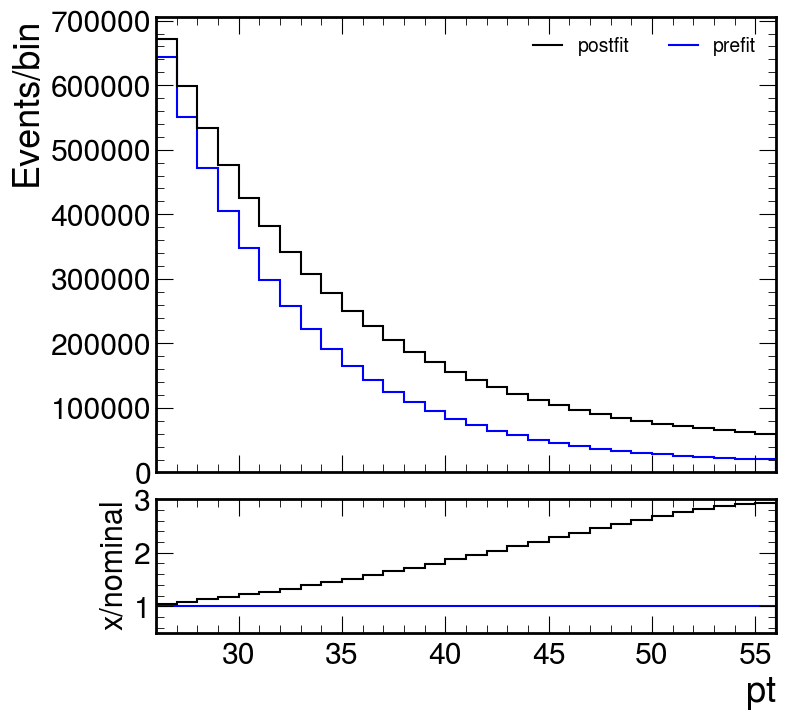

In [178]:
fig = plot_tools.makePlotWithRatioToRef(
    [prefit_fake_pt.project("pt"), 
     postfit_fake_pt.project("pt")
    ],
    colors=["blue", "black",], 
    labels=["prefit", "postfit"], 
    rrange=[.5, 3], 
    binwnorm=1.)

In [26]:
fitresult_hybrid = uproot.open("/scratch/dwalter/CombineStudies/240819_mw_unblinding/WMass_eta_pt_charge_hybrid/fitresults_123456789_data.root")
prefit_hybrid = fitresult_hybrid["expproc_Fake_prefit"].to_hist()
postfit_hybrid = fitresult_hybrid["expproc_Fake_postfit"].to_hist()

In [27]:
prefit_hybrid_pt = full_hist(prefit_hybrid)
postfit_hybrid_pt = full_hist(postfit_hybrid)

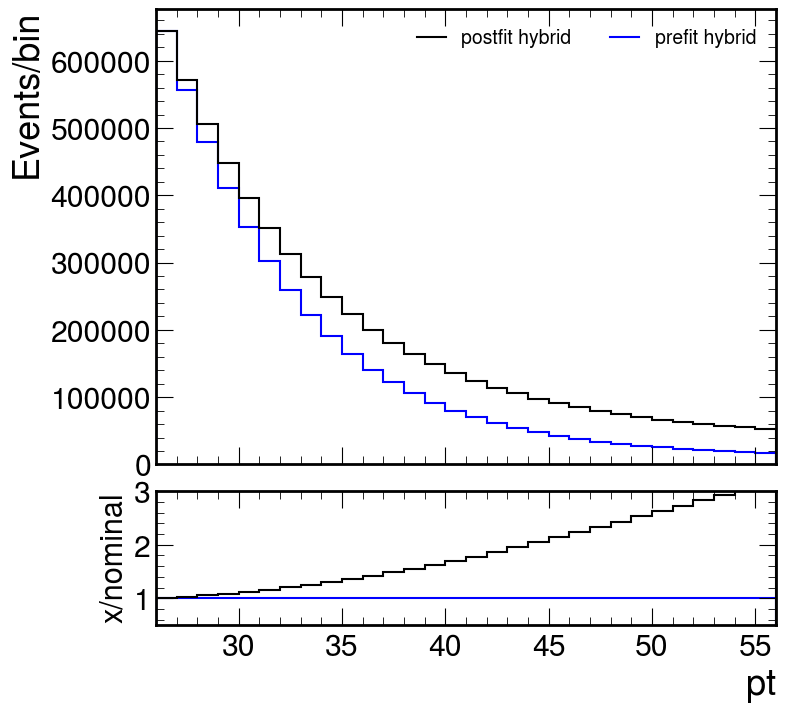

In [191]:
fig = plot_tools.makePlotWithRatioToRef(
    [prefit_hybrid_pt.project("pt"), 
     psotfit_hybrid_pt.project("pt")],
    colors=["blue", "black",], 
    labels=["prefit hybrid", "postfit hybrid"], 
    rrange=[.5, 3], 
    binwnorm=1.)

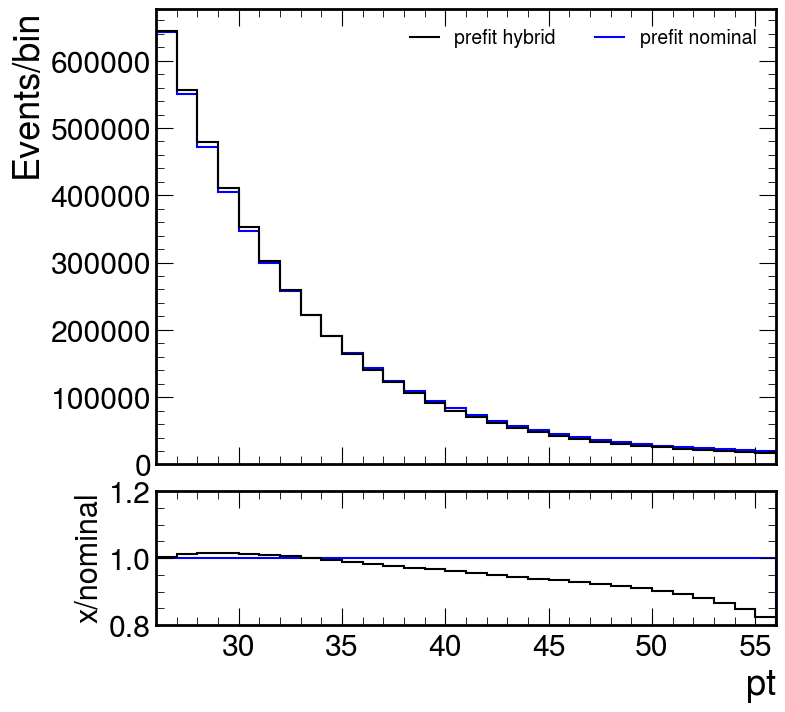

In [194]:
fig = plot_tools.makePlotWithRatioToRef(
    [prefit_fake_pt.project("pt"), prefit_hybrid_pt.project("pt")],
    colors=["blue", "black",], 
    labels=["prefit nominal", "prefit hybrid"], 
    rrange=[.8, 1.2], 
    binwnorm=1.)

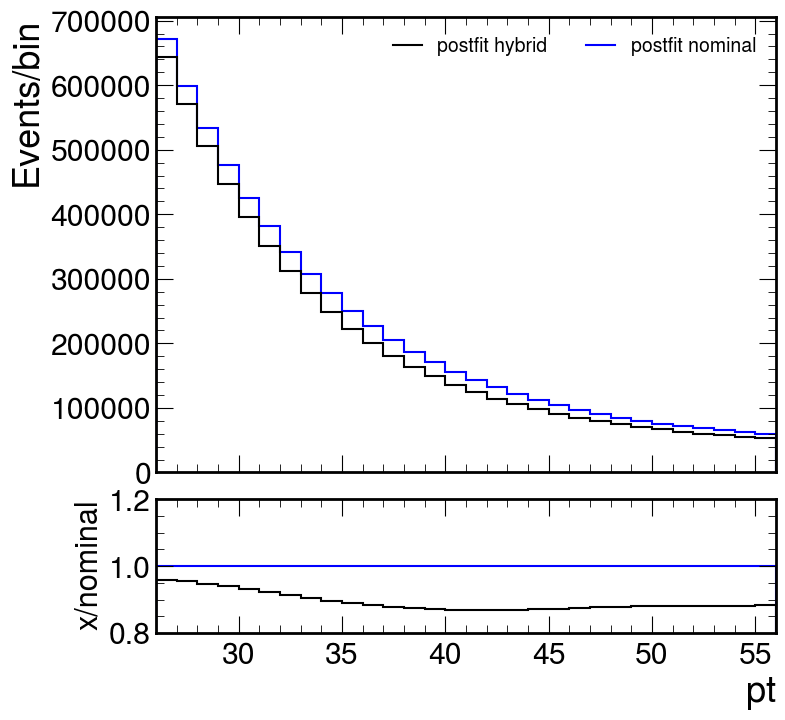

In [197]:
fig = plot_tools.makePlotWithRatioToRef(
    [postfit_fake_pt.project("pt"), postfit_hybrid_pt.project("pt")],
    colors=["blue", "black",], 
    labels=["postfit nominal", "postfit hybrid"], 
    rrange=[.8, 1.2], 
    binwnorm=1.)

In [171]:
prefit_all = fitresult["expfull_prefit"].to_hist()
postfit_all = fitresult["expfull_postfit"].to_hist()

In [172]:
prefit_pt_all = full_hist(prefit_all)
postfit_pt_all = full_hist(postfit_all)


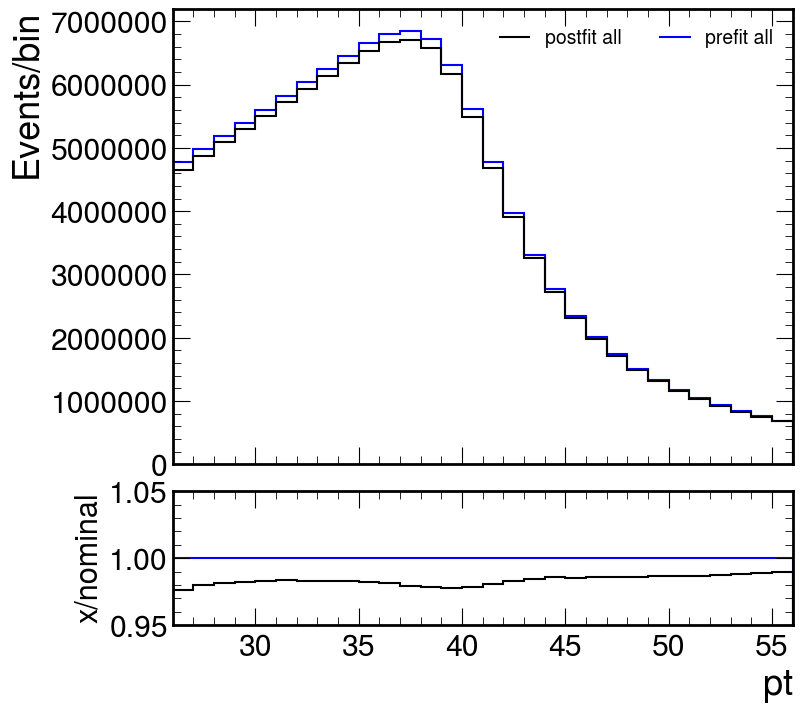

In [201]:
fig = plot_tools.makePlotWithRatioToRef(
    [prefit_pt_all.project("pt"), postfit_pt_all.project("pt")],
    colors=["blue", "black",], 
    labels=["prefit all", "postfit all"], 
    rrange=[.95, 1.05], 
    binwnorm=1.)

In [174]:
prefit_w = fitresult["expproc_Wmunu_prefit"].to_hist()
postfit_w = fitresult["expproc_Wmunu_postfit"].to_hist()

In [175]:
prefit_w_pt = full_hist(prefit_w)
postfit_w_pt = full_hist(postfit_w)

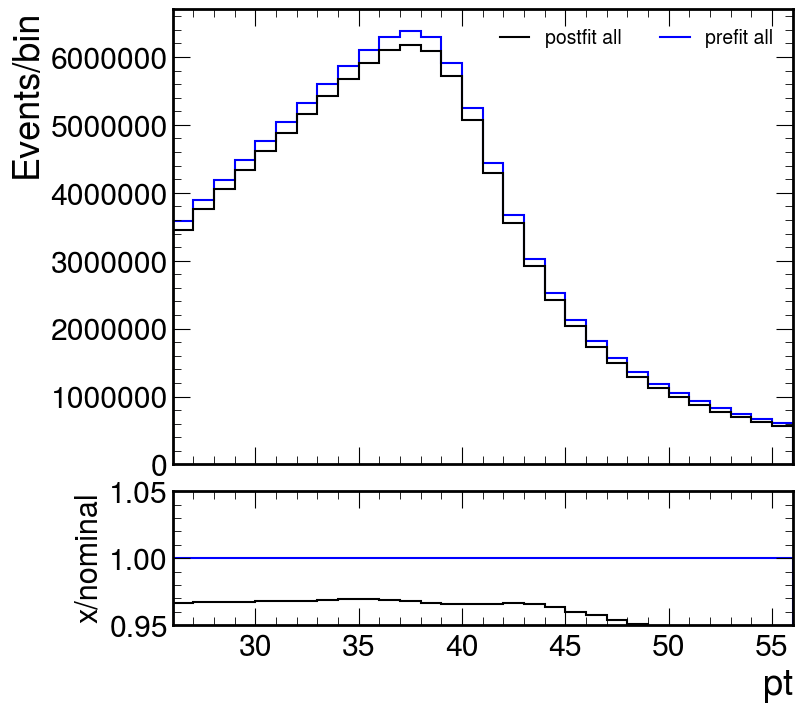

In [207]:
fig = plot_tools.makePlotWithRatioToRef(
    [
        prefit_w_pt.project("pt"),
        postfit_w_pt.project("pt"),
    ],
    colors=["blue", "black",], 
    labels=["prefit all", "postfit all"], 
    rrange=[.95, 1.05], 
    binwnorm=1.)

In [217]:
postfit_newnom.sum()/prefit_newnom.sum()

1.302477976951695

In [184]:
fitresult_new = uproot.open("/scratch/dwalter/CombineStudies/240820_mw_unblinding/WMass_eta_pt_charge/fitresults_123456789_unblind.root")
postfit_newnom = full_hist(fitresult_new["expproc_Fake_postfit"].to_hist())
prefit_newnom = full_hist(fitresult_new["expproc_Fake_prefit"].to_hist())

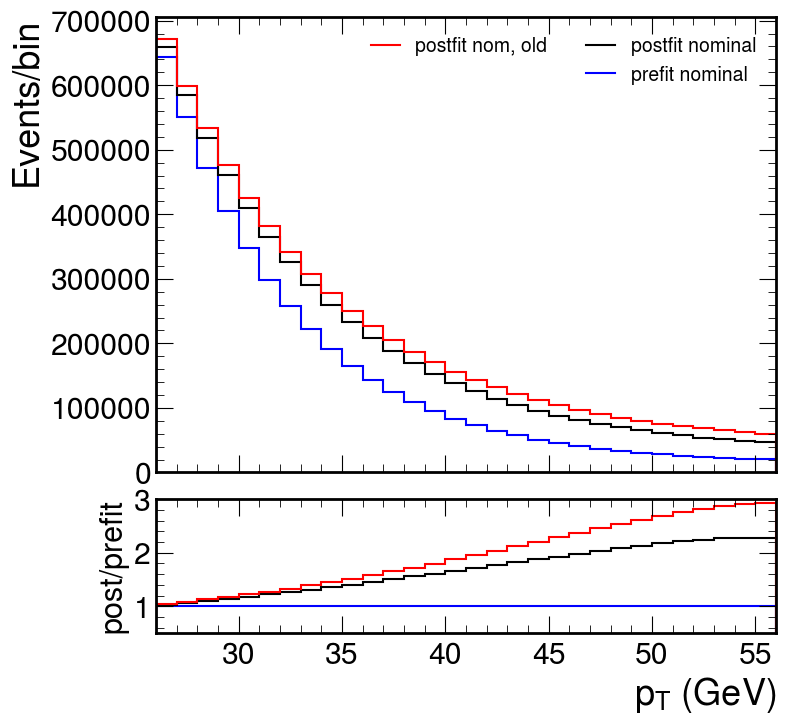

In [20]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("pt") for x in 
    [
        prefit_newnom, 
        postfit_newnom,
        postfit_fake_pt,
    ]],
    colors=["blue", "black", "red",], 
    labels=["prefit nominal", "postfit nominal", "postfit nom, old"], 
    rrange=[.5, 3], 
    rlabel="post/prefit",
    xlabel="$p_{T}$ (GeV)",
    binwnorm=1.)

In [176]:
fitresult_hybnew = uproot.open("/eos/cms/store/cmst3/group/wmass/results_Aug20_51483092e6/WMass_eta_pt_charge_hybrid/fitresults_123456789_unblind.root")
postfit_hybnew = full_hist(fitresult_hybnew["expproc_Fake_postfit"].to_hist())
prefit_hybnew =full_hist(fitresult_hybnew["expproc_Fake_prefit"].to_hist())

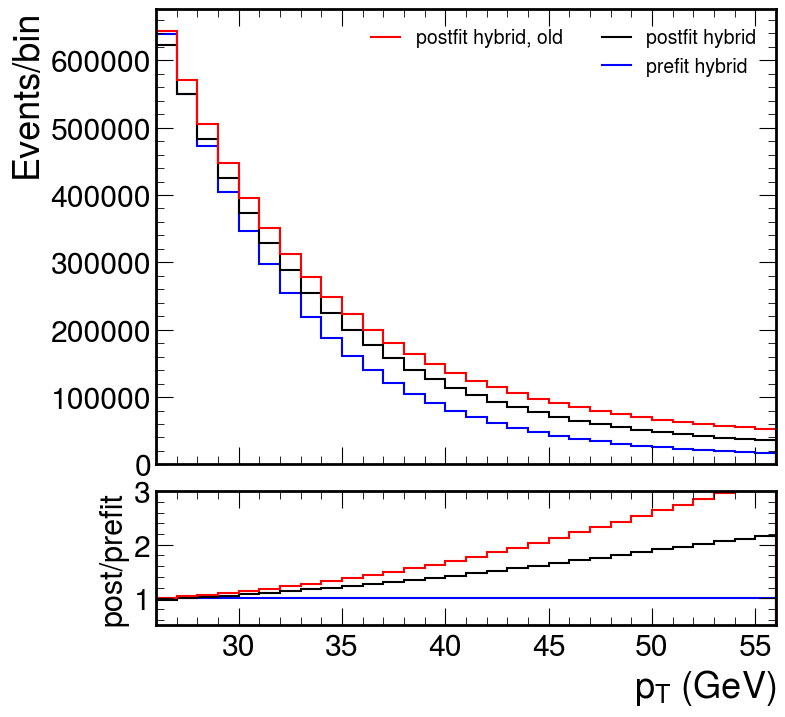

In [38]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("pt") for x in 
    [
        prefit_hybnew, 
        postfit_hybnew,
        postfit_hybrid_pt,
    ]],
    colors=["blue", "black", "red",], 
    labels=["prefit hybrid", "postfit hybrid", "postfit hybrid, old"], 
    rrange=[.5, 3], 
    rlabel="post/prefit",
    xlabel="$p_{T}$ (GeV)",
    binwnorm=1.)

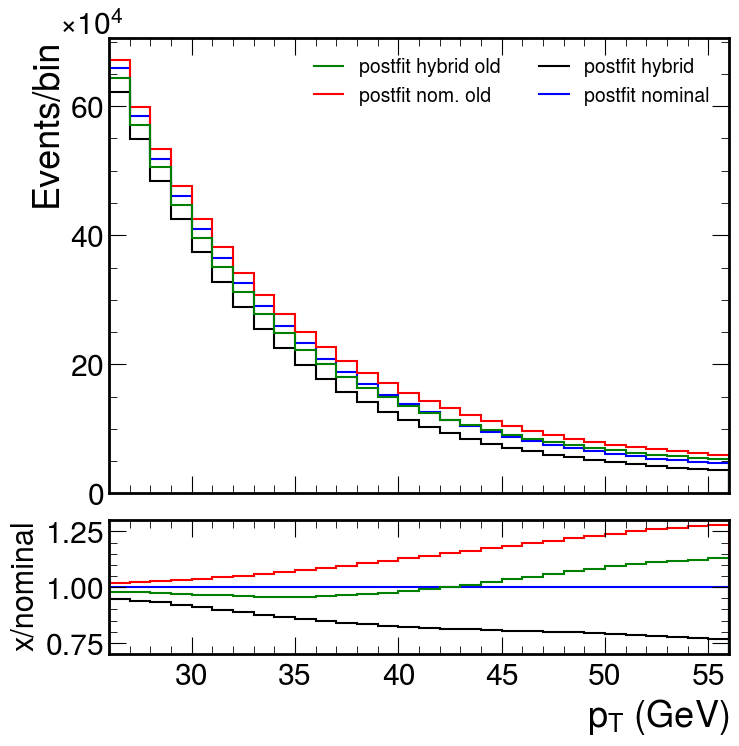

In [77]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("pt") for x in 
    [
        postfit_newnom, 
        postfit_hybnew,
        postfit_fake_pt,
        postfit_hybrid_pt,
    ]],
    colors=["blue", "black", "red", "green"], 
    labels=["postfit nominal", "postfit hybrid", "postfit nom. old", "postfit hybrid old"], 
    rrange=[.7, 1.3], 
    rlabel="x/nominal",
    xlabel="$p_{T}$ (GeV)",
    binwnorm=1.)
ax1, ax2 = fig.get_axes()
ax1.ticklabel_format(style="sci", useMathText=True, axis="y", scilimits=(4,4), useLocale=True)
ax1.yaxis.get_offset_text().set_x(-0.08)

array([8., 8.])

In [177]:
fitresult_nonc = uproot.open("/scratch/kelong/CombineStudies/WMass_eta_pt_charge_noFakeNonClosUnc/fitresults_123456789.root")
postfit_nonc = full_hist(fitresult_nonc["expproc_Fake_postfit"].to_hist())
prefit_nonc = full_hist(fitresult_nonc["expproc_Fake_prefit"].to_hist())

Wrote file(s) /tmp/kelong/tmp0a9zsbse/www/WMassAnalysis/2024Aug_Unblinded/W//fakes_PostfitVsPrefitNominalNoParamUnc_pt.pdf(.png)


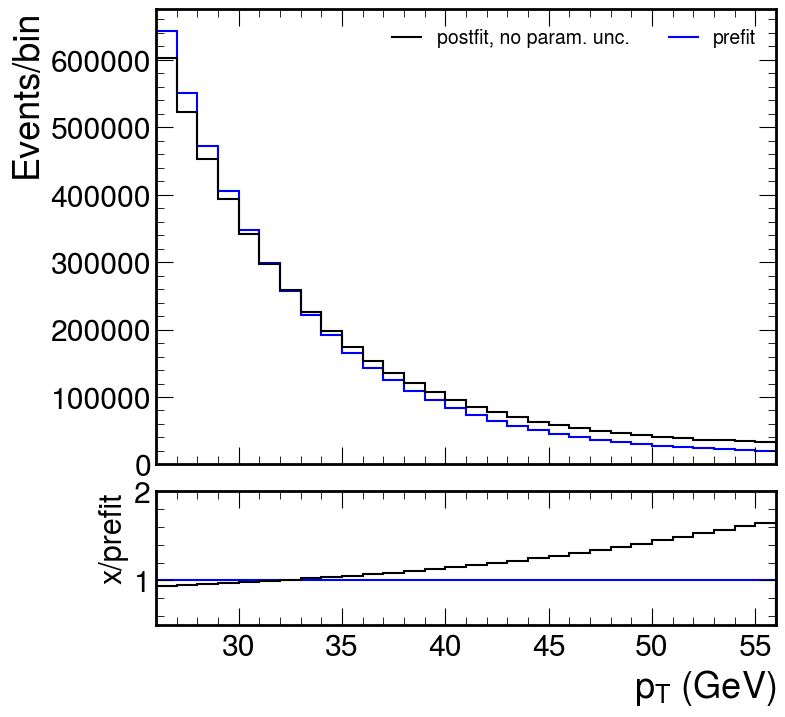

In [213]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("pt") for x in 
    [
        prefit_nonc, 
        postfit_nonc,
    ]],
    colors=["blue", "black",], 
    labels=["prefit", "postfit, no param. unc.",], 
    rrange=[.5, 2], 
    rlabel="x/prefit",
    xlabel="$p_{T}$ (GeV)",
    binwnorm=1.)
#ax1, ax2 = fig.get_axes()
#x1.ticklabel_format(style="sci", useMathText=True, axis="y", scilimits=(4,4), useLocale=True)
name = "fakes_PostfitVsPrefitNominalNoParamUnc_pt"
outdir = output_tools.make_plot_dir(out, outfolder, eoscp=True)
plot_tools.save_pdf_and_png(outdir, name, fig)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, outfolder)

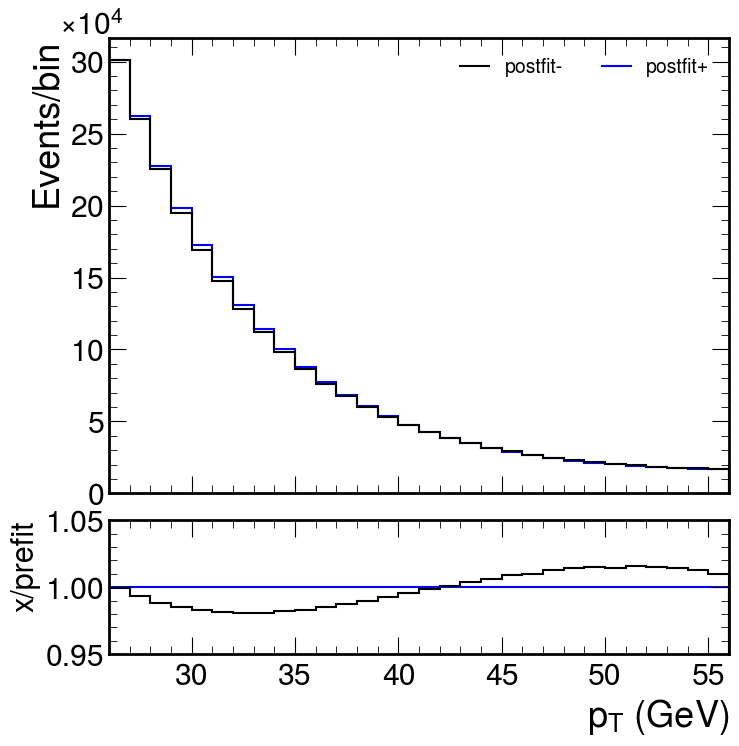

In [114]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("pt") for x in 
    [
        postfit_nonc[{"charge" : 0}], 
        postfit_nonc[{"charge" : 1}],
    ]],
    colors=["blue", "black",], 
    labels=["postfit+", "postfit-",], 
    rrange=[.95, 1.05], 
    rlabel="x/prefit",
    xlabel="$p_{T}$ (GeV)",
    binwnorm=1.)
ax1, ax2 = fig.get_axes()
ax1.ticklabel_format(style="sci", useMathText=True, axis="y", scilimits=(4,4), useLocale=True)
ax1.yaxis.get_offset_text().set_x(-0.08)

In [178]:
fitresult_smoothfr = uproot.open("/scratch/kelong/CombineStudies/WMass_eta_pt_charge_smoothFR//fitresults_123456789.root")
postfit_smoothfr = full_hist(fitresult_smoothfr["expproc_Fake_postfit"].to_hist())
prefit_smoothfr = full_hist(fitresult_smoothfr["expproc_Fake_prefit"].to_hist())

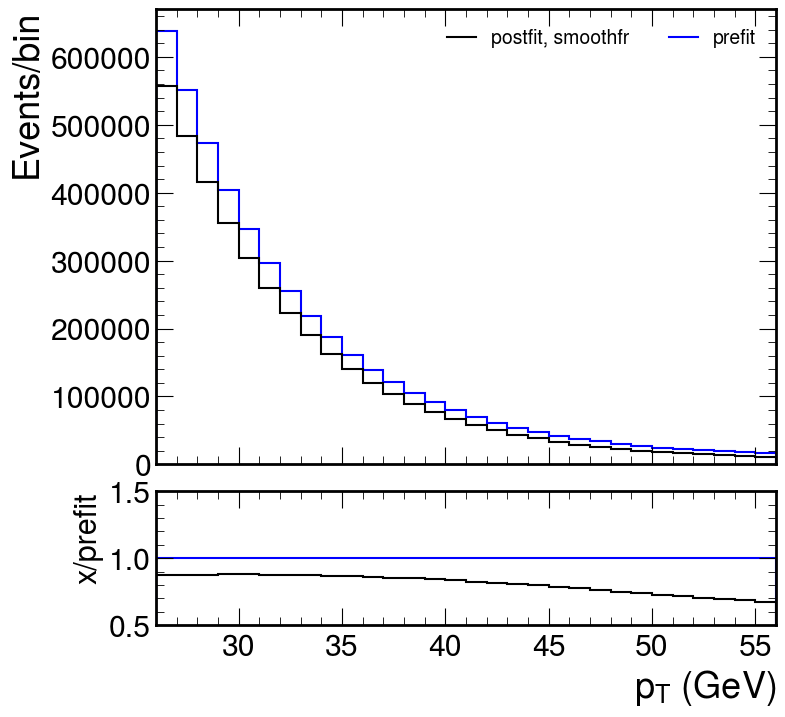

In [142]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("pt") for x in 
    [
        prefit_smoothfr, 
        postfit_smoothfr,
    ]],
    colors=["blue", "black",], 
    labels=["prefit", "postfit, smoothfr",], 
    rrange=[.5, 1.5], 
    rlabel="x/prefit",
    xlabel="$p_{T}$ (GeV)",
    binwnorm=1.)

In [179]:
fitresult_binned = uproot.open("/scratch/kelong/CombineStudies/WMass_eta_pt_charge_binnedFake//fitresults_123456789.root")
postfit_binned = full_hist(fitresult_binned["expproc_Fake_postfit"].to_hist())
prefit_binned = full_hist(fitresult_binned["expproc_Fake_prefit"].to_hist())

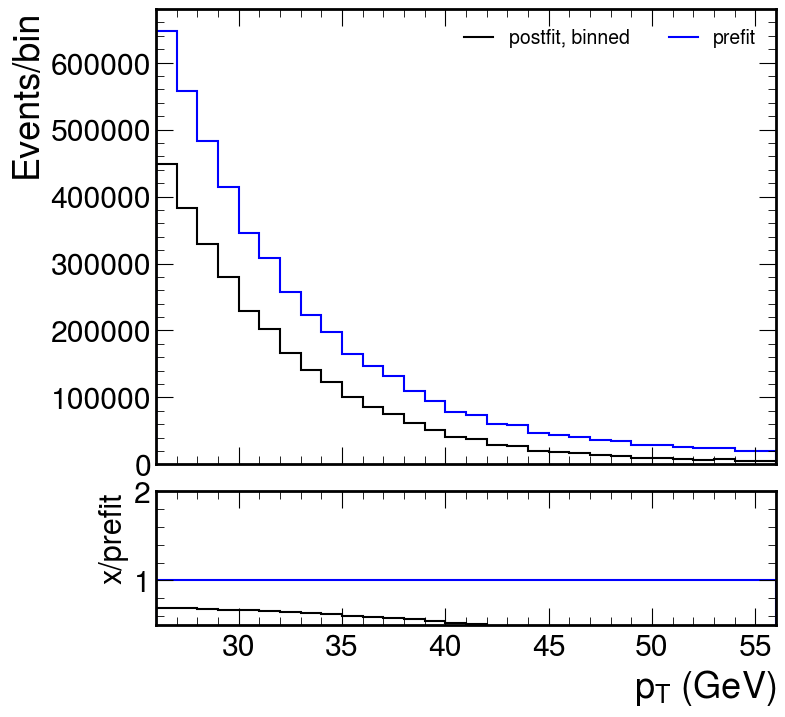

In [123]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("pt") for x in 
    [
        prefit_binned, 
        postfit_binned,
    ]],
    colors=["blue", "black",], 
    labels=["prefit", "postfit, binned",], 
    rrange=[.5, 2], 
    rlabel="x/prefit",
    xlabel="$p_{T}$ (GeV)",
    binwnorm=1.)

In [132]:
postfit_hybnew

Hist(Regular(2880, -0.5, 2879.5, name='xaxis'), storage=Weight()) # Sum: WeightedSum(value=6.00426e+06, variance=9.6671e+07)

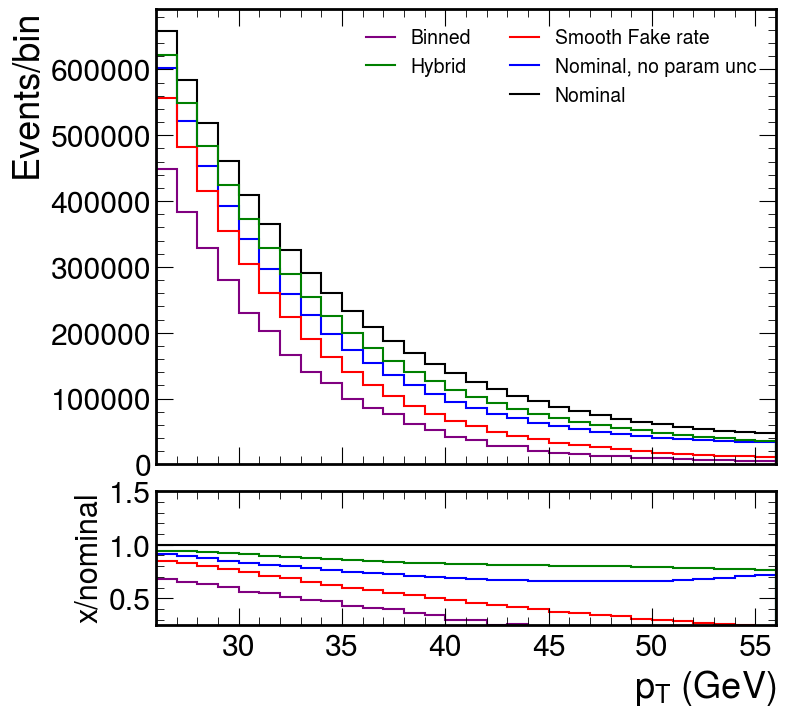

In [180]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("pt") for x in 
    [
        postfit_newnom, 
        postfit_nonc,
        postfit_smoothfr,
        postfit_hybnew,
        postfit_binned
    ]],
    colors=["black", "blue", "red", "green", "purple"], 
    labels=["Nominal", "Nominal, no param unc", "Smooth Fake rate", "Hybrid", "Binned"], 
    rrange=[.25, 1.5], 
    rlabel="x/nominal",
    xlabel="$p_{T}$ (GeV)",
    binwnorm=1.)

Wrote file(s) /tmp/kelong/tmpaxqxxxcc/www/WMassAnalysis/2024Aug_Unblinded/W//fakes_PostfitScan_pt.pdf(.png)


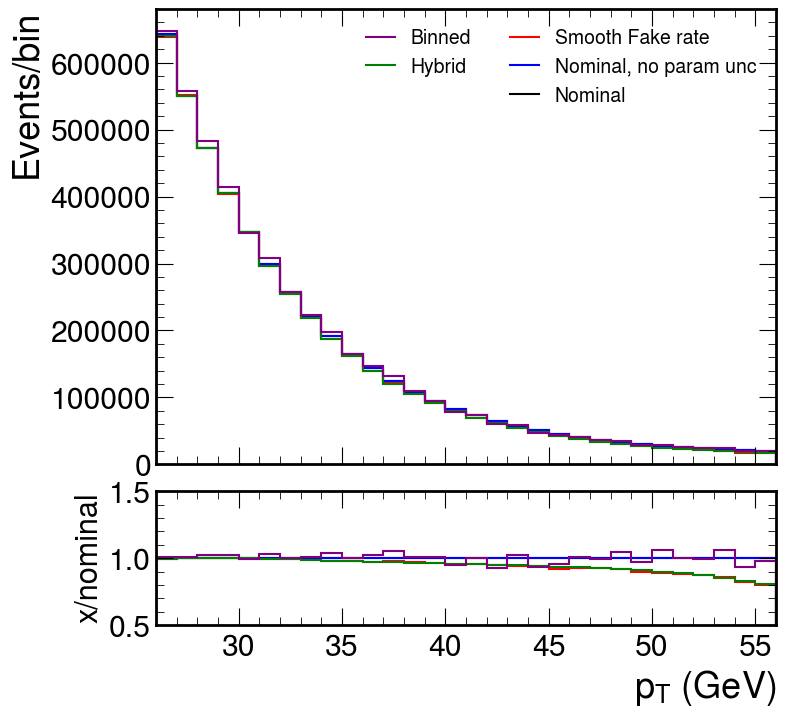

In [211]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("pt") for x in 
    [
        prefit_newnom, 
        prefit_nonc,
        prefit_smoothfr,
        prefit_hybnew,
        prefit_binned
    ]],
    colors=["black", "blue", "red", "green", "purple"], 
    labels=["Nominal", "Nominal, no param unc", "Smooth Fake rate", "Hybrid", "Binned"], 
    rrange=[.5, 1.5], 
    rlabel="x/nominal",
    xlabel="$p_{T}$ (GeV)",
    binwnorm=1.)
name = "fakes_PostfitScan_pt"
outdir = output_tools.make_plot_dir(out, outfolder, eoscp=True)
plot_tools.save_pdf_and_png(outdir, name, fig)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, outfolder)

Wrote file(s) /tmp/kelong/tmp8ysx9doq/www/WMassAnalysis/2024Aug_Unblinded/W//fakes_PostfitVsPrefitNominal_pt.pdf(.png)


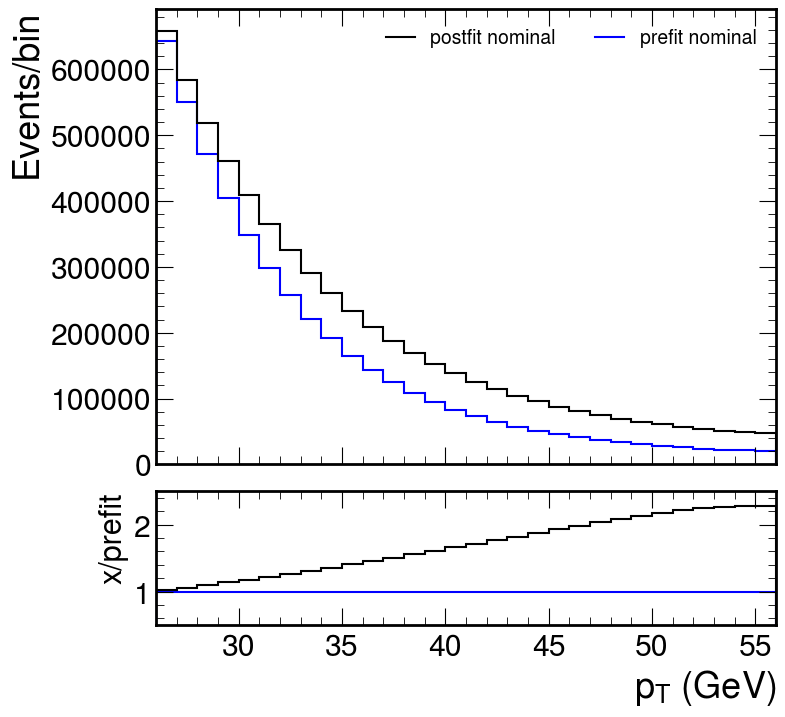

In [210]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("pt") for x in 
    [
        prefit_newnom, 
        postfit_newnom,
    ]],
    colors=["blue", "black",], 
    labels=["prefit nominal", "postfit nominal",], 
    rrange=[.5, 2.5], 
    rlabel="x/prefit",
    xlabel="$p_{T}$ (GeV)",
    binwnorm=1.)
name = "fakes_PostfitVsPrefitNominal_pt"
outdir = output_tools.make_plot_dir(out, outfolder, eoscp=True)
plot_tools.save_pdf_and_png(outdir, name, fig)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, outfolder)

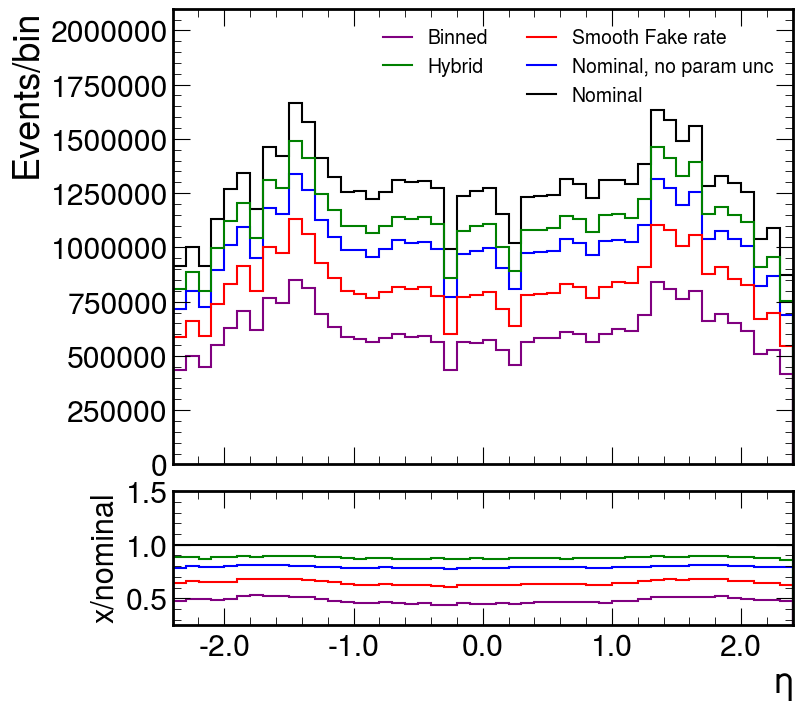

In [189]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("eta") for x in 
    [
        postfit_newnom, 
        postfit_nonc,
        postfit_smoothfr,
        postfit_hybnew,
        postfit_binned
    ]],
    colors=["black", "blue", "red", "green", "purple"], 
    labels=["Nominal", "Nominal, no param unc", "Smooth Fake rate", "Hybrid", "Binned"], 
    rrange=[.25, 1.5], 
    rlabel="x/nominal",
    xlabel="$\eta$",
    yscale=1.2,
    binwnorm=1.)

Wrote file(s) /tmp/kelong/tmpeh70y71g/www/WMassAnalysis/2024Aug_Unblinded/W//fakes_PrefitScan_eta.pdf(.png)


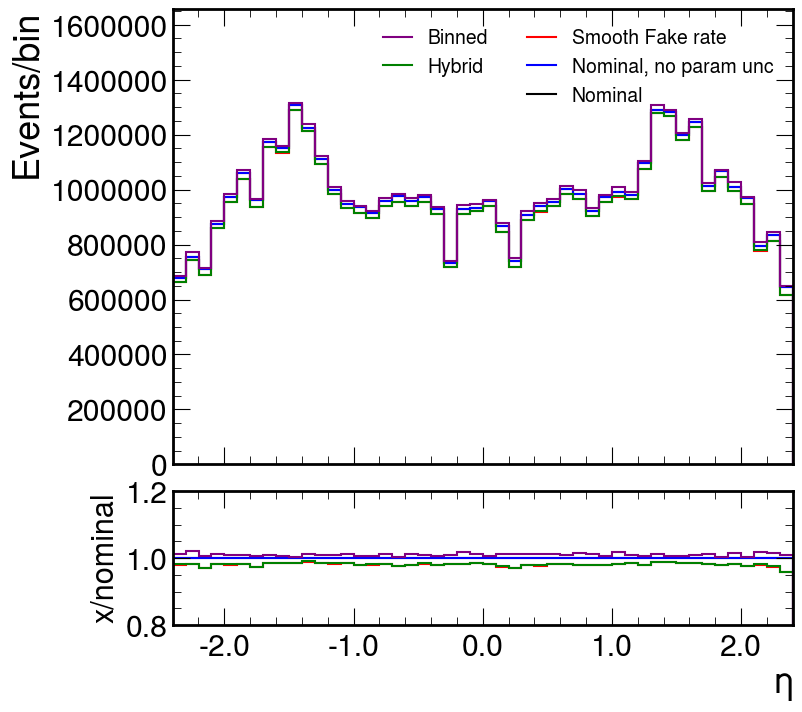

In [209]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("eta") for x in 
    [
        prefit_newnom, 
        prefit_nonc,
        prefit_smoothfr,
        prefit_hybnew,
        prefit_binned
    ]],
    colors=["black", "blue", "red", "green", "purple"], 
    labels=["Nominal", "Nominal, no param unc", "Smooth Fake rate", "Hybrid", "Binned"], 
    rrange=[.8, 1.2], 
    rlabel="x/nominal",
    xlabel="$\eta$",
    yscale=1.2,
    binwnorm=1.)
name = "fakes_PrefitScan_eta"
outdir = output_tools.make_plot_dir(out, outfolder, eoscp=True)
plot_tools.save_pdf_and_png(outdir, name, fig)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, outfolder)

Wrote file(s) /tmp/kelong/tmp6qlojobl/www/WMassAnalysis/2024Aug_Unblinded/W//fakes_postfitScanVsPrefitNom_eta.pdf(.png)


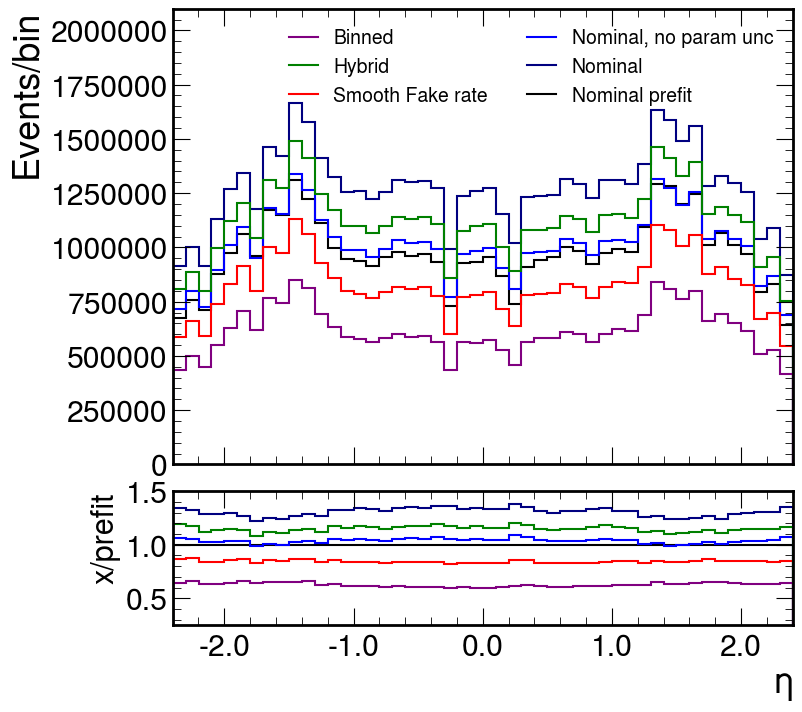

In [206]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("eta") for x in 
    [
        prefit_newnom,
        postfit_newnom, 
        postfit_nonc,
        postfit_smoothfr,
        postfit_hybnew,
        postfit_binned
    ]],
    colors=["black", 
            "navy", "blue", "red", "green", "purple"], 
    labels=["Nominal prefit", "Nominal", "Nominal, no param unc", "Smooth Fake rate", "Hybrid", "Binned"], 
    rrange=[.25, 1.5], 
    rlabel="x/prefit",
    xlabel="$\eta$",
    yscale=1.2,
    binwnorm=1.)
name = "fakes_postfitScanVsPrefitNom_eta"
plot_tools.save_pdf_and_png(outdir, name, fig)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, outfolder, deleteFullTmp=False)

Wrote file(s) /tmp/kelong/tmpzzq64xha/www/WMassAnalysis/2024Aug_Unblinded/W//fakes_postfitScanVsPrefitNom.pdf(.png)


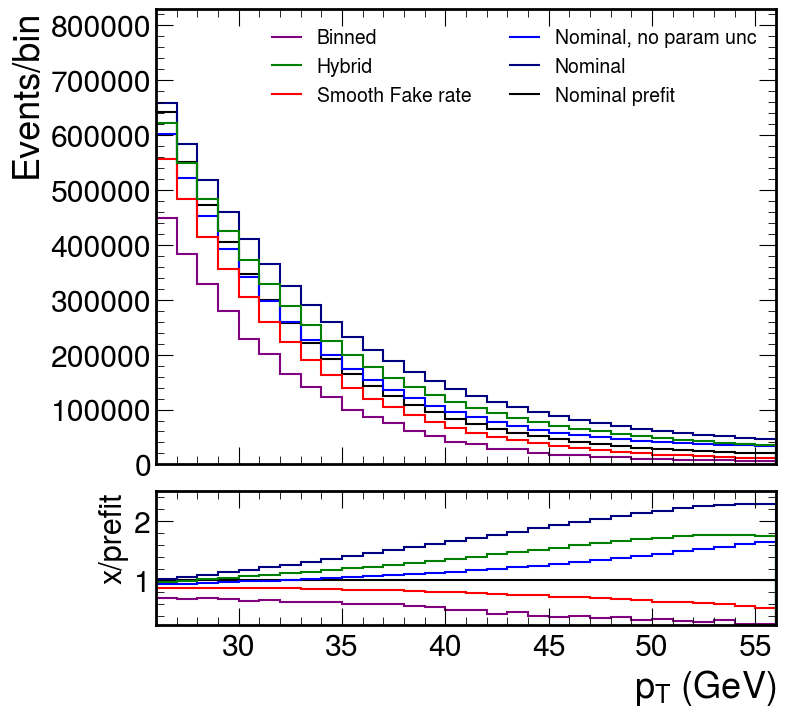

In [202]:
fig = plot_tools.makePlotWithRatioToRef(
    [x.project("pt") for x in 
    [
        prefit_newnom,
        postfit_newnom, 
        postfit_nonc,
        postfit_smoothfr,
        postfit_hybnew,
        postfit_binned
    ]],
    colors=["black", 
            "navy", "blue", "red", "green", "purple"], 
    labels=["Nominal prefit", "Nominal", "Nominal, no param unc", "Smooth Fake rate", "Hybrid", "Binned"], 
    rrange=[.25, 2.5], 
    rlabel="x/prefit",
    xlabel="$p_{T}$ (GeV)",
    yscale=1.2,
    binwnorm=1.)
name = "fakes_postfitScanVsPrefitNom"
plot_tools.save_pdf_and_png(outdir, name, fig)
plot_tools.write_index_and_log(outdir, name)
output_tools.copy_to_eos(outdir, out, outfolder)